# Build a model that classifies the side effects of a drug 

**Dataset Description**

* Name (categorical)       : Name of the patient
* Age (numerical)          : Age group range of user
* Race (categorical)       : Race of the patients 
* Condition (categorical)  : Name of condition
* Date (date)              : date of review entry
* Drug (categorical)       : Name of drug
* EaseOfUse (numerical)    : 5 star rating
* Effectiveness (numerical): 5 star rating
* Sex (categorical)        : gender of user
* Side (text)              : side effects associated with drug (if any)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df1=pd.read_csv('Side_effect.csv')
df1.head()

,Name,Age,Race,Condition,Date,Drug,EaseofUse,Effectiveness,Sex,Sides
0,Brandon Jordan,51-60,Asian,Pain,9/21/2014,choline mag trisalicylate,5,5,female,no side effects
1,Todd Gardner,31-40,White,Pain,1/13/2011,lortab,5,5,female,no side effects
2,Phillip Medina,31-40,White,High Cholesterol,7/16/2012,cholestyramine light 4 gram oral powde,2,3,female,moderate side effects
3,Lisa Price,71-80,White,Pain,9/23/2010,lortab,2,2,female,extreme severe side effects
4,Anthony Davis,71-80,Hispanic,Birth Control,1/6/2009,chateal,1,1,female,extreme severe side effects


In [3]:
df1.columns

Index(['Name', 'Age', 'Race', 'Condition', 'Date', 'Drug', 'EaseofUse',
       'Effectiveness', 'Sex', 'Sides'],
      dtype='object')

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362803 entries, 0 to 362802
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Name           362803 non-null  object
 1   Age            362800 non-null  object
 2   Race           362800 non-null  object
 3   Condition      362800 non-null  object
 4   Date           362803 non-null  object
 5   Drug           362800 non-null  object
 6   EaseofUse      362803 non-null  int64 
 7   Effectiveness  362803 non-null  int64 
 8   Sex            362800 non-null  object
 9   Sides          362803 non-null  object
dtypes: int64(2), object(8)
memory usage: 27.7+ MB


In [5]:
df1.describe()

,EaseofUse,Effectiveness
count,362803.000000,362803.000000
mean,4.019801,3.532030
std,1.317671,1.455916
min,1.000000,1.000000
25%,3.000000,3.000000
50%,5.000000,4.000000
75%,5.000000,5.000000
max,5.000000,5.000000


In [6]:
df1.describe(include='object')

,Name,Age,Race,Condition,Date,Drug,Sex,Sides
count,362803,362800,362800,362800,362803,362800,362800,362803
unique,180963,10,4,15,4524,28,2,5
top,Michael Smith,71-80,White,Pain,10/29/2007,lexapro,female,no side effects
freq,189,69187,115600,39771,404,29166,254006,111550


In [7]:
df1.shape

(362803, 10)

# Pre-Processing

# missing values

In [8]:
df1.isnull().sum()

Name             0
Age              3
Race             3
Condition        3
Date             0
Drug             3
EaseofUse        0
Effectiveness    0
Sex              3
Sides            0
dtype: int64

In [9]:
df1['Race'] = df1['Race'].fillna(df1['Race'].mode()[0])
df1['Sex'] = df1['Sex'].fillna(df1['Sex'].mode()[0])
df1['Age'] = df1['Age'].fillna(df1['Age'].mode()[0])
df1['Condition'] = df1['Condition'].fillna(df1['Condition'].mode()[0])
df1['Drug'] = df1['Drug'].fillna(df1['Drug'].mode()[0])

In [10]:
df1.isnull().sum()

Name             0
Age              0
Race             0
Condition        0
Date             0
Drug             0
EaseofUse        0
Effectiveness    0
Sex              0
Sides            0
dtype: int64

# Outliers

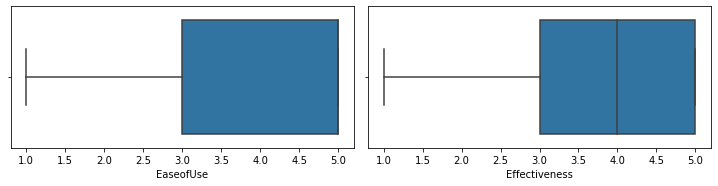

In [11]:
# Plot boxplot to find outliers
#boxplot
df_numerical = df1.select_dtypes(exclude='object')
x=1
plt.figure(figsize = (20, 15))
for col in df_numerical.columns:
    plt.subplot(6,4,x)
    sns.boxplot(df1[col])
    x+=1
plt.tight_layout()

**There are no outliers in the dataset**

# Encoding

In [12]:
df1.describe(include='object')

,Name,Age,Race,Condition,Date,Drug,Sex,Sides
count,362803,362803,362803,362803,362803,362803,362803,362803
unique,180963,10,4,15,4524,28,2,5
top,Michael Smith,71-80,White,Pain,10/29/2007,lexapro,female,no side effects
freq,189,69190,115603,39774,404,29169,254009,111550


**Label Encoding**

In [13]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [14]:
df1.head()

,Name,Age,Race,Condition,Date,Drug,EaseofUse,Effectiveness,Sex,Sides
0,Brandon Jordan,51-60,Asian,Pain,9/21/2014,choline mag trisalicylate,5,5,female,no side effects
1,Todd Gardner,31-40,White,Pain,1/13/2011,lortab,5,5,female,no side effects
2,Phillip Medina,31-40,White,High Cholesterol,7/16/2012,cholestyramine light 4 gram oral powde,2,3,female,moderate side effects
3,Lisa Price,71-80,White,Pain,9/23/2010,lortab,2,2,female,extreme severe side effects
4,Anthony Davis,71-80,Hispanic,Birth Control,1/6/2009,chateal,1,1,female,extreme severe side effects


In [15]:
data =df1.copy()

In [16]:
data['Condition']=le.fit_transform(data['Condition'])

In [17]:
data['Drug']=le.fit_transform(data['Drug'])

In [18]:
data['Race']=le.fit_transform(data['Race'])
data['Sex']=le.fit_transform(data['Sex'])

In [19]:
data.head()

,Name,Age,Race,Condition,Date,Drug,EaseofUse,Effectiveness,Sex,Sides
0,Brandon Jordan,51-60,0,11,9/21/2014,9,5,5,0,no side effects
1,Todd Gardner,31-40,3,11,1/13/2011,19,5,5,0,no side effects
2,Phillip Medina,31-40,3,5,7/16/2012,8,2,3,0,moderate side effects
3,Lisa Price,71-80,3,11,9/23/2010,19,2,2,0,extreme severe side effects
4,Anthony Davis,71-80,2,0,1/6/2009,6,1,1,0,extreme severe side effects


In [20]:
data['Age']=data.Age.map({
    '0-10': 0,
    '11-20':1,
    '21-30':2,
    '31-40':3,
    '41-50':4,
    '51-60':5,
    '61-70':6,
    '71-80':7,
    '81-90':8,
    '91-100':9,
    })

In [21]:
data.shape

(362803, 10)

In [22]:
data.head()

,Name,Age,Race,Condition,Date,Drug,EaseofUse,Effectiveness,Sex,Sides
0,Brandon Jordan,5,0,11,9/21/2014,9,5,5,0,no side effects
1,Todd Gardner,3,3,11,1/13/2011,19,5,5,0,no side effects
2,Phillip Medina,3,3,5,7/16/2012,8,2,3,0,moderate side effects
3,Lisa Price,7,3,11,9/23/2010,19,2,2,0,extreme severe side effects
4,Anthony Davis,7,2,0,1/6/2009,6,1,1,0,extreme severe side effects


# Feature Reduction

We can drop Name and Date columns as they dont influence the side effects

In [23]:
data=data.drop(['Name','Date'],axis=1)

<AxesSubplot:>

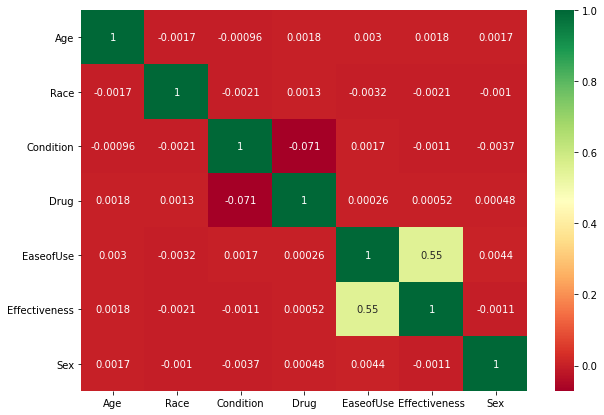

In [24]:
#Lets see the correlation
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn')

Since  Effectivenes and EaseofUse are highly correlated to each other we only need to take one of them for modelling.

In [25]:
data=data.drop(['EaseofUse'],axis=1)

In [26]:
data.shape

(362803, 7)

In [27]:
y=data['Sides']
x=data.drop(['Sides'],axis=1)

# **Scaling**

In [28]:
cols= x.columns

In [29]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
scale=['Effectiveness']
x[scale] = ss.fit_transform(x[scale])

In [30]:
x.head()

,Age,Race,Condition,Drug,Effectiveness,Sex
0,5,0,11,9,1.008281,0
1,3,3,11,19,1.008281,0
2,3,3,5,8,-0.365427,0
3,7,3,11,19,-1.052280,0
4,7,2,0,6,-1.739134,0


In [31]:
x.describe()

,Age,Race,Condition,Drug,Effectiveness,Sex
count,362803.000000,362803.000000,362803.000000,362803.000000,3.628030e+05,362803.000000
mean,4.795716,1.737447,7.333589,12.999476,-9.018848e-15,0.299871
std,2.653872,1.091378,4.072557,7.943760,1.000001e+00,0.458202
min,0.000000,0.000000,0.000000,0.000000,-1.739134e+00,0.000000
25%,3.000000,1.000000,4.000000,6.000000,-3.654266e-01,0.000000
50%,5.000000,2.000000,7.000000,13.000000,3.214270e-01,0.000000
75%,7.000000,3.000000,11.000000,20.000000,1.008281e+00,1.000000
max,9.000000,3.000000,14.000000,27.000000,1.008281e+00,1.000000


# Exploratory Data Analysis (EDA)

**Gender and Gender vs Side Effects**

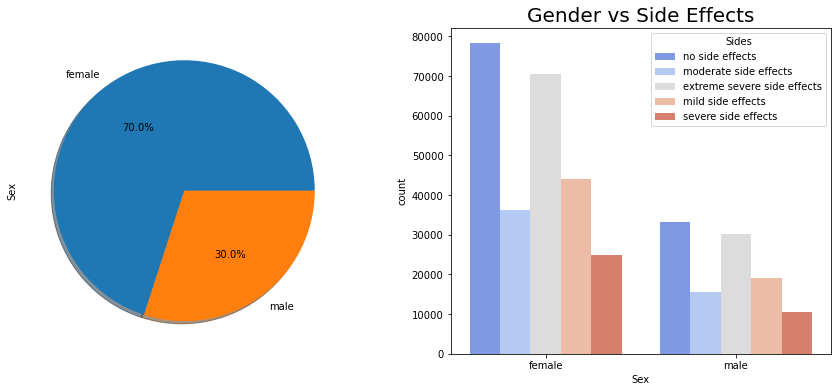

female    0.700129
male      0.299871
Name: Sex, dtype: float64

In [32]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
df1['Sex'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
plt.subplot(1, 2, 2)
sns.countplot(data = df1, x = 'Sex',hue='Sides' ,palette='coolwarm')
plt.title('Gender vs Side Effects', size=20)
plt.show()
df1.Sex.value_counts(normalize=True)

**Race and Race vs Side Effects**

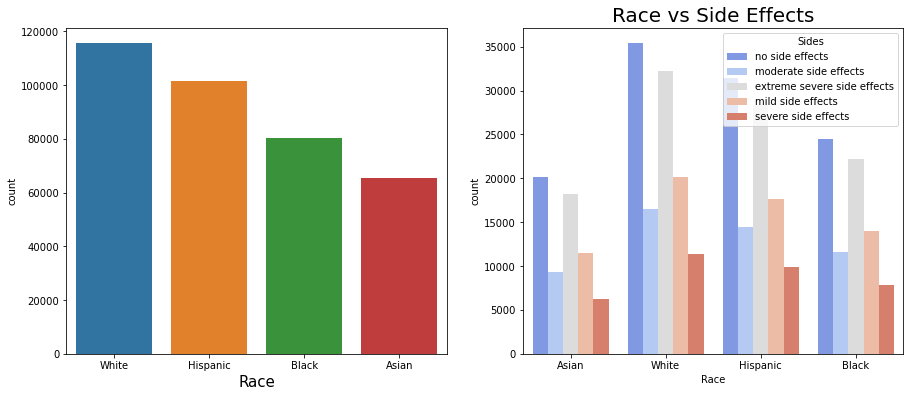

White       0.318638
Hispanic    0.280273
Black       0.220985
Asian       0.180103
Name: Race, dtype: float64

In [33]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
sns.countplot(data=df1,x='Race',order=df1['Race'].value_counts().index)
plt.xlabel('Race', fontsize=15)
plt.subplot(1, 2, 2)
sns.countplot(data = df1, x = 'Race',hue='Sides' ,palette='coolwarm')
plt.title('Race vs Side Effects', size=20)
plt.show()
df1.Race.value_counts(normalize=True)

**Side Effect**

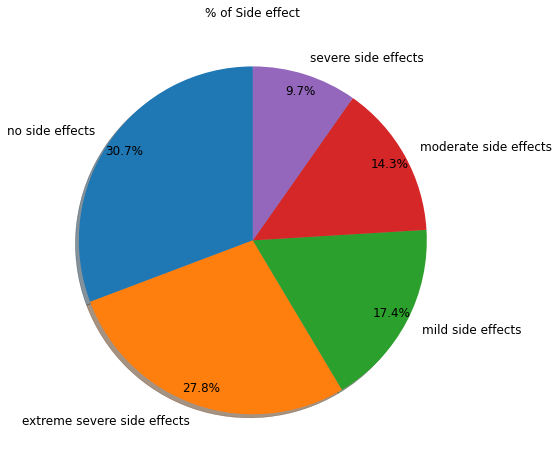

no side effects                0.307467
extreme severe side effects    0.278115
mild side effects              0.174083
moderate side effects          0.142921
severe side effects            0.097414
Name: Sides, dtype: float64

In [34]:
plt.figure(figsize=(10,8))
plt.title('% of Side effect')
tr = pd.DataFrame(df1['Sides'].value_counts())
tr_names = tr.index
count = tr['Sides']
plt.style.use('ggplot')
plt.rc('font', size=12)
plt.pie(count, autopct='%1.1f%%', labels = tr_names, pctdistance=0.9, labeldistance=1.1,shadow=True, startangle=90)
plt.show()
df1.Sides.value_counts(normalize=True)

**Conditions**

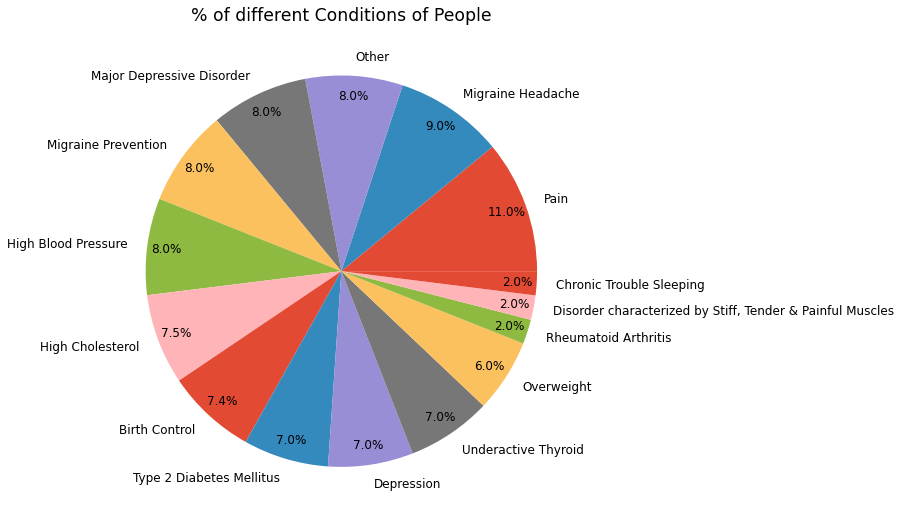

In [35]:
plt.figure(figsize=(15,9))
plt.title('% of different Conditions of People')
tr = pd.DataFrame(df1['Condition'].value_counts())
tr_names = tr.index
count = tr['Condition']
plt.style.use('ggplot')
plt.rc('font', size=12)
plt.pie(count, autopct='%1.1f%%', labels = tr_names, pctdistance=0.9, labeldistance=1.1)
plt.show()

In [36]:
df1.Condition.value_counts()

Pain                                                         39774
Migraine Headache                                            32538
Other                                                        29126
Major Depressive Disorder                                    29124
Migraine Prevention                                          29002
High Blood Pressure                                          28953
High Cholesterol                                             27135
Birth Control                                                26951
Type 2 Diabetes Mellitus                                     25552
Depression                                                   25502
Underactive Thyroid                                          25368
Overweight                                                   21926
Rheumatoid Arthritis                                          7353
Disorder characterized by Stiff, Tender & Painful Muscles     7330
Chronic Trouble Sleeping                                      

In [37]:
df1[df1.Drug=='celexa']

,Name,Age,Race,Condition,Date,Drug,EaseofUse,Effectiveness,Sex,Sides
5,Elizabeth Holt,21-30,Black,Depression,7/19/2008,celexa,4,4,female,mild side effects
7,Joshua Hammond,91-100,Black,Depression,1/30/2017,celexa,5,5,female,no side effects
8,Timothy Green,0-10,Hispanic,Depression,4/27/2016,celexa,4,2,female,severe side effects
12,Mark Gilbert,91-100,White,Depression,7/3/2018,celexa,2,1,female,extreme severe side effects
29,Ashley Armstrong,51-60,Asian,Major Depressive Disorder,3/31/2014,celexa,5,1,male,extreme severe side effects
...,...,...,...,...,...,...,...,...,...,...
362734,Marcus Orozco,0-10,Black,Depression,4/9/2009,celexa,1,1,female,extreme severe side effects
362736,Linda Mendez MD,41-50,White,Depression,4/4/2009,celexa,3,2,female,severe side effects
362756,Sean Harmon,21-30,White,Depression,3/4/2009,celexa,5,1,male,severe side effects
362766,Lauren Pierce,71-80,White,Major Depressive Disorder,1/29/2009,celexa,5,5,female,no side effects


**Drug**

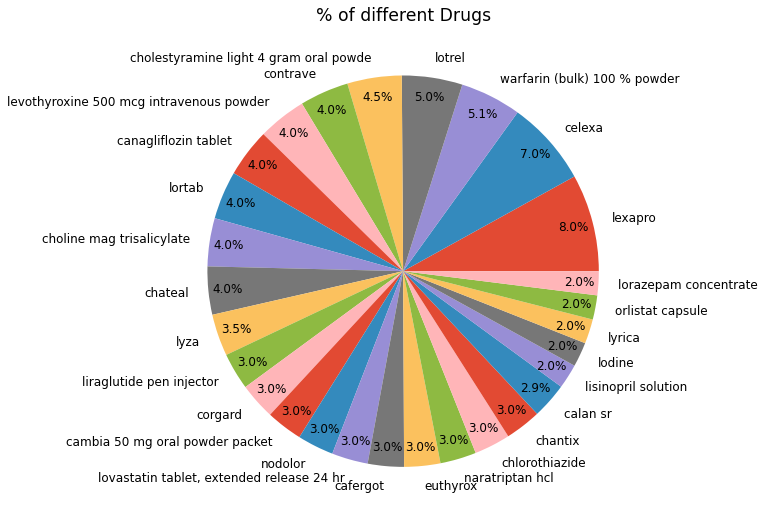

In [38]:
plt.figure(figsize=(15,9))
plt.title('% of different Drugs')
tr = pd.DataFrame(df1['Drug'].value_counts())
tr_names = tr.index
count = tr['Drug']
plt.style.use('ggplot')
plt.rc('font', size=12)
plt.pie(count, autopct='%1.1f%%', labels = tr_names, pctdistance=0.9, labeldistance=1.1)
plt.show()

**Age and Age vs Side Effects**

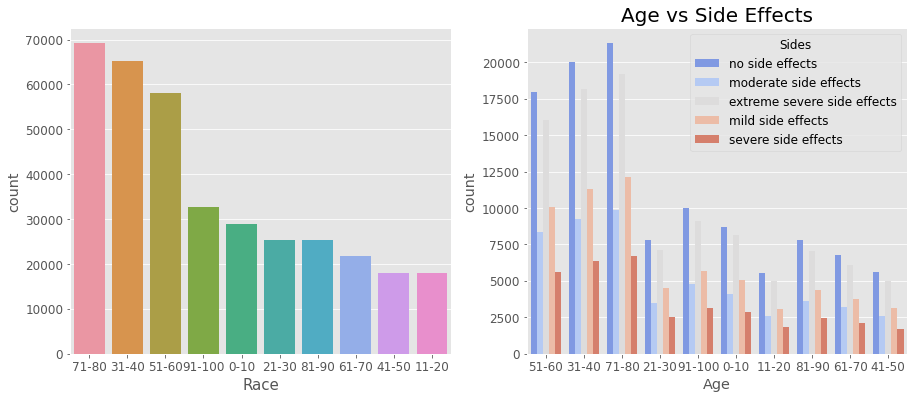

no side effects                0.307467
extreme severe side effects    0.278115
mild side effects              0.174083
moderate side effects          0.142921
severe side effects            0.097414
Name: Sides, dtype: float64

In [39]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
sns.countplot(data=df1,x='Age',order=df1['Age'].value_counts().index)
plt.xlabel('Race', fontsize=15)
plt.subplot(1, 2, 2)
sns.countplot(data = df1, x = 'Age',hue='Sides' ,palette='coolwarm')
plt.title('Age vs Side Effects', size=20)
plt.show()
df1.Sides.value_counts(normalize=True)

**Effectiveness and Effectiveness vs Side Effects**

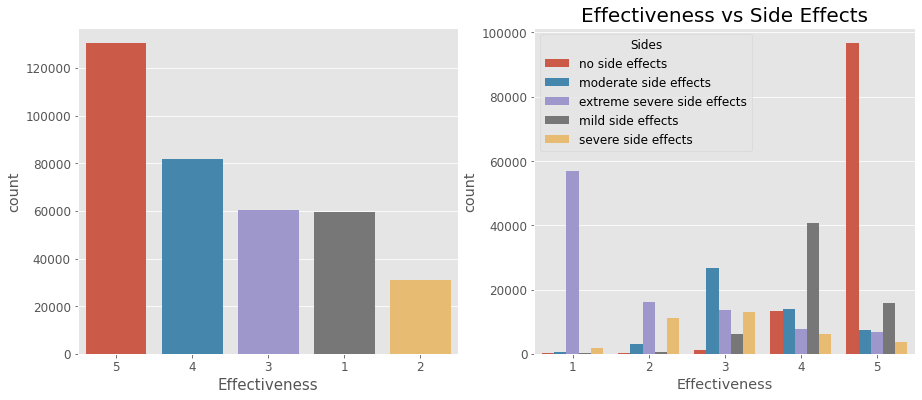

5    0.359391
4    0.225525
3    0.166498
1    0.163689
2    0.084897
Name: Effectiveness, dtype: float64

In [40]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
sns.countplot(data=df1,x='Effectiveness',order=df1['Effectiveness'].value_counts().index)
plt.xlabel('Effectiveness', fontsize=15)
plt.subplot(1, 2, 2)
sns.countplot(data = df1, x = 'Effectiveness',hue='Sides' )
plt.title('Effectiveness vs Side Effects', size=20)
plt.show()
df1.Effectiveness.value_counts(normalize=True)

**Effectiveness vs Sex** 

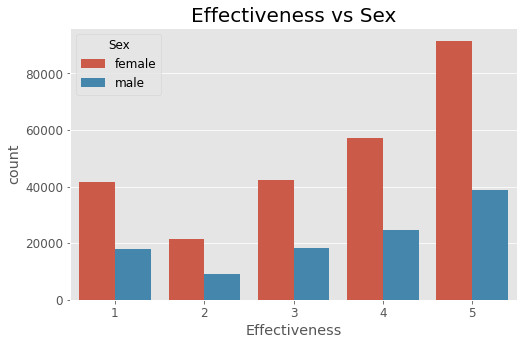

5    0.359391
4    0.225525
3    0.166498
1    0.163689
2    0.084897
Name: Effectiveness, dtype: float64

In [41]:
plt.figure(figsize=(8,5))
sns.countplot(data = df1, x = 'Effectiveness',hue='Sex' )
plt.title('Effectiveness vs Sex', size=20)
plt.show()
df1.Effectiveness.value_counts(normalize=True)

**Ease of Use and Ease of Use vs Side Effects**

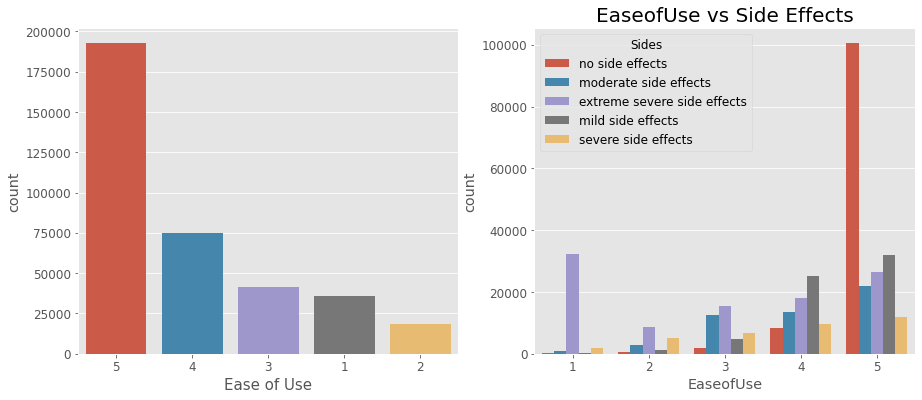

5    0.531004
4    0.205985
3    0.113844
1    0.099026
2    0.050140
Name: EaseofUse, dtype: float64

In [42]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
sns.countplot(data=df1,x='EaseofUse',order=df1['EaseofUse'].value_counts().index)
plt.xlabel('Ease of Use', fontsize=15)
plt.subplot(1, 2, 2)
sns.countplot(data = df1, x = 'EaseofUse',hue='Sides' )
plt.title('EaseofUse vs Side Effects', size=20)
plt.show()
df1.EaseofUse.value_counts(normalize=True)

**Effectiveness vs Age**

Text(0.5, 1.0, 'Effectiveness vs Age')

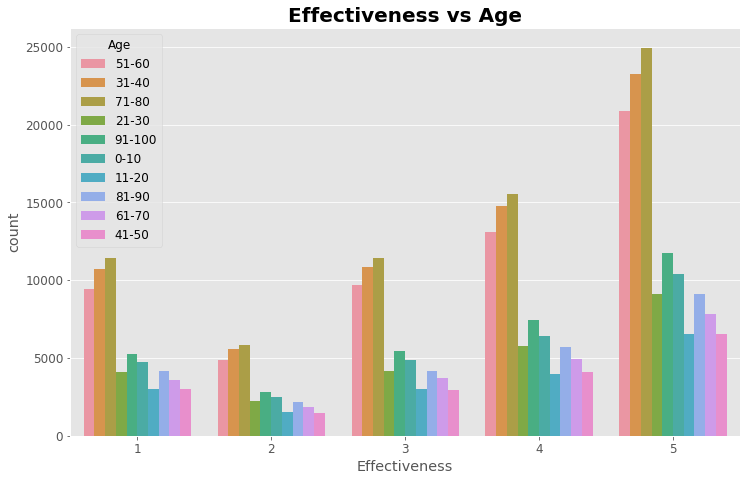

In [43]:
plt.figure(figsize=(12, 7.5))
sns.countplot(x='Effectiveness',hue='Age', data=df1,)
plt.title("Effectiveness vs Age",fontweight="bold", size=20)

**Ease of Use vs Age**

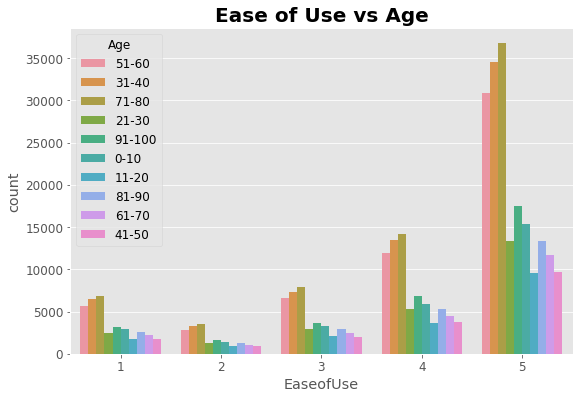

In [44]:
plt.figure(figsize=(9, 6))
sns.countplot(x='EaseofUse',hue='Age', data=df1)
plt.title("Ease of Use vs Age",fontweight="bold", size=20)
plt.show()

**Ease of Use vs Sex**

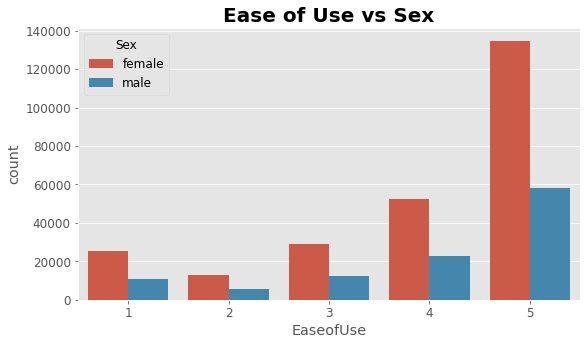

In [45]:
plt.figure(figsize=(9,5))
sns.countplot(x='EaseofUse',hue='Sex', data=df1)
plt.title("Ease of Use vs Sex",fontweight="bold", size=20)
plt.show()

**Correlation Heatmap**

<AxesSubplot:>

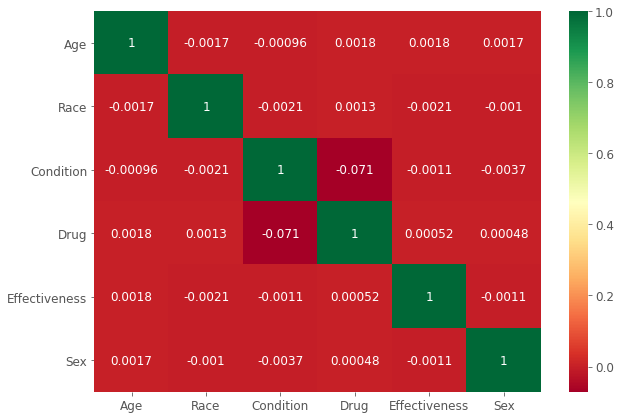

In [46]:
#Lets see the correlation
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn')

# Splitting Dataset into train and test datasets

In [47]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report

# Modelling

**a. LogisticRegression**

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [49]:
print('Accuracy on Logistic Regression is : ',accuracy_score(y_test,y_pred))
print('precision is : ',precision_score(y_test,y_pred,average='macro'))
print('recall is : ',recall_score(y_test,y_pred,average='macro'))
print('f1 score is : ',f1_score(y_test,y_pred,average='macro'))

Accuracy on Logistic Regression is :  0.61865189289012
precision is :  0.3639483240004598
recall is :  0.4751346400253751
f1 score is :  0.41109771302166787


In [50]:
confusion_matrix(y_test,y_pred)

array([[17257,  1522,     0,  1395,     0],
       [ 1303,  8169,     0,  3115,     0],
       [ 6104,  2746,     0,  1525,     0],
       [  343,  2533,     0, 19464,     0],
       [ 5179,  1167,     0,   739,     0]], dtype=int64)

**b. KNN**

In [51]:
from sklearn.neighbors import KNeighborsClassifier
#find optimum k- value.We have to create model with varied k values
acc_values=[]
neighbors=np.arange(3,18) #taking values 3 to 15 into a variable

#loop to ceate KNN model for each k-value
for k in neighbors:
    knn=KNeighborsClassifier(n_neighbors=k,metric='minkowski')#instance of KNN to variable
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    #append accuracy values to acc_values to find out the maximum accuracy
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

In [52]:
acc_values

[0.5570623337605601,
 0.5784374526260664,
 0.5908959358332989,
 0.6010804702250521,
 0.6100797949311614,
 0.6169705489174625,
 0.622152395915161,
 0.6248535714777911,
 0.6272791168809692,
 0.630297267126969,
 0.6313308802249142,
 0.6327228125301471,
 0.6343214674549689,
 0.6347624757100921,
 0.634734912694147]

Text(0, 0.5, 'Accuracy')

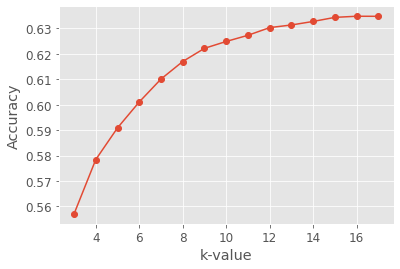

In [53]:
#find correspomd k value corresponding to highest accuracy
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k-value')
plt.ylabel('Accuracy')

In [54]:
#Make a model with k as 16
knn=KNeighborsClassifier(n_neighbors=16,metric='minkowski')#instance of KNN to variable
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [55]:
print('Accuracy on KNN is : ',accuracy_score(y_test,y_pred))
print('precision is : ',precision_score(y_test,y_pred,average='macro'))
print('recall is : ',recall_score(y_test,y_pred,average='macro'))
print('f1 score is : ',f1_score(y_test,y_pred,average='macro'))

Accuracy on KNN is :  0.6347624757100921
precision is :  0.5348497674058836
recall is :  0.5264854870276583
f1 score is :  0.5124509884113625


In [56]:
confusion_matrix(y_test,y_pred)

array([[14724,  1574,  1923,  1461,   492],
       [  364,  7558,  1088,  3501,    76],
       [ 1583,  2874,  3839,  1649,   430],
       [  171,  2359,   256, 19527,    27],
       [ 2801,  1234,  1845,   794,   411]], dtype=int64)

**c. Random Forest Classifier**

In [57]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [58]:
print('Accuracy on Random Forest is : ',accuracy_score(y_test,y_pred))
print('f1 score is : ',f1_score(y_test,y_pred,average='macro'))
print('precision is : ',precision_score(y_test,y_pred,average='macro'))
print('recall is : ',recall_score(y_test,y_pred,average='macro'))

Accuracy on Random Forest is :  0.6454982704207495
f1 score is :  0.5415941349913731
precision is :  0.5606423920109893
recall is :  0.5502720432084863


In [59]:
confusion_matrix(y_test,y_pred)

array([[14018,  1500,  2323,  1410,   923],
       [  179,  7930,  1132,  3221,   125],
       [ 1005,  2663,  4626,  1554,   527],
       [  105,  2439,   258, 19501,    37],
       [ 2223,  1133,  2207,   759,   763]], dtype=int64)

**d. Fine tuning random forest classifier**

In [60]:
rft=RandomForestClassifier(bootstrap=True,n_estimators=500,oob_score=True,max_depth=20,criterion='entropy',random_state=92)
rft.fit(x_train,y_train)
y_pred=rft.predict(x_test)

In [61]:
print('Accuracy on Fine tuned Random Forest is : ',accuracy_score(y_test,y_pred))
print('f1 score is : ',f1_score(y_test,y_pred,average='macro'))
print('precision is : ',precision_score(y_test,y_pred,average='macro'))
print('recall is : ',recall_score(y_test,y_pred,average='macro'))

Accuracy on Fine tuned Random Forest is :  0.6464354129628864
f1 score is :  0.5413003329962675
precision is :  0.5615324764057364
recall is :  0.5508120620101673


In [62]:
confusion_matrix(y_test,y_pred)

array([[14059,  1497,  2335,  1412,   871],
       [  175,  7944,  1155,  3201,   112],
       [  978,  2679,  4692,  1541,   485],
       [  101,  2442,   271, 19494,    32],
       [ 2234,  1139,  2243,   752,   717]], dtype=int64)

**e. Gradient Boosting**

In [66]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred=gb.predict(x_test)

In [67]:
print('Accuracy on Gradient Boosting is : ',accuracy_score(y_test,y_pred))
print('precision is : ',precision_score(y_test,y_pred,average='macro'))
print('recall is : ',recall_score(y_test,y_pred,average='macro'))
print('f1 score is : ',f1_score(y_test,y_pred,average='macro'))

Accuracy on Gradient Boosting is :  0.6557103678284478
precision is :  0.4993771885613321
recall is :  0.5519428605549604
f1 score is :  0.5219059574216122


In [68]:
confusion_matrix(y_test,y_pred)

array([[14590,  1522,  2667,  1395,     0],
       [  107,  8169,  1196,  3115,     0],
       [  748,  2746,  5356,  1525,     0],
       [   89,  2533,   254, 19464,     0],
       [ 2619,  1167,  2560,   739,     0]], dtype=int64)

**f. Gaussian Naive Bayes**

In [63]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [64]:
print('Accuracy on naive_bayes is : ',accuracy_score(y_test,y_pred))
print('precision is : ',precision_score(y_test,y_pred,average='macro'))
print('recall is : ',recall_score(y_test,y_pred,average='macro'))
print('f1 score is : ',f1_score(y_test,y_pred,average='macro'))

Accuracy on naive_bayes is :  0.61865189289012
precision is :  0.3639483240004598
recall is :  0.4751346400253751
f1 score is :  0.41109771302166787


In [65]:
confusion_matrix(y_test,y_pred)

array([[17257,  1522,     0,  1395,     0],
       [ 1303,  8169,     0,  3115,     0],
       [ 6104,  2746,     0,  1525,     0],
       [  343,  2533,     0, 19464,     0],
       [ 5179,  1167,     0,   739,     0]], dtype=int64)